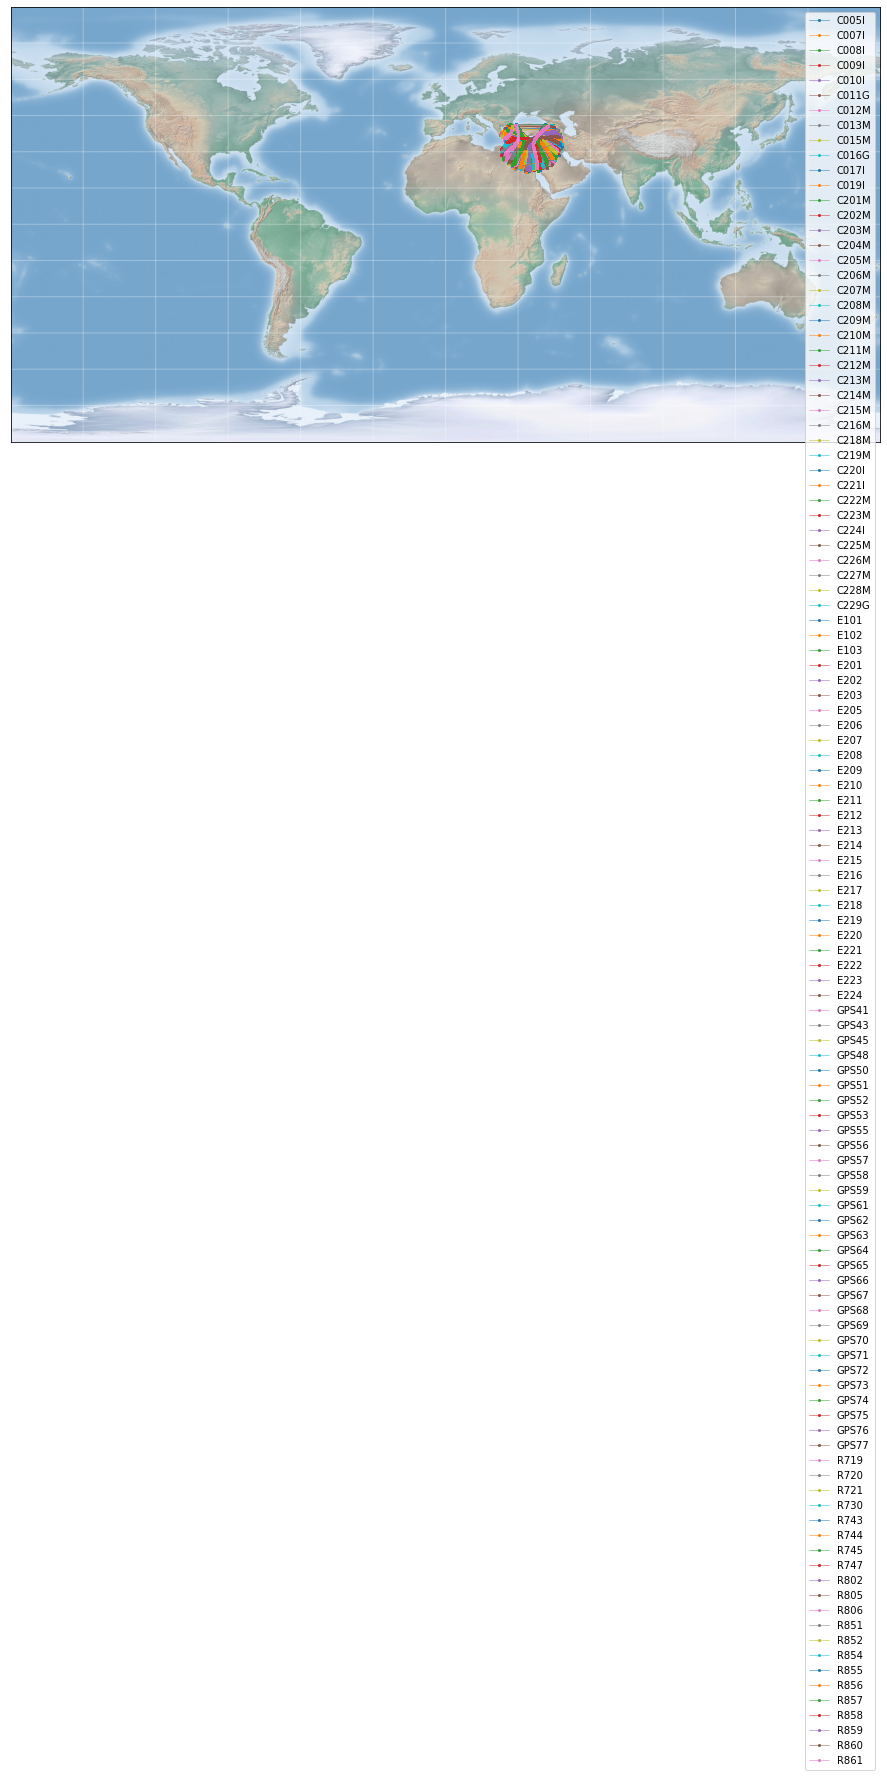

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from itertools import chain
import geopandas as gpd
from shapely.geometry import Point


df1 = pd.read_csv('BSHM_230206.csv')

df1['UTCTime'] = pd.to_datetime(df1['UTCTime'], format='%y%m%d%H%M%S')
df1['FormattedTime'] = df1['UTCTime'].dt.strftime('%Y-%m-%d %H:%M:%S')


geometry = [Point(lon, lat) for lon, lat in zip(df1['ipplon'], df1['ipplat'])]
geo_df1 = gpd.GeoDataFrame(df1, geometry=geometry, crs="EPSG:4326")

# Create a Basemap plot
fig = plt.figure(figsize=(25, 8), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)


m.shadedrelief(scale=0.2)

for sat, group in geo_df1.groupby('sat'):
    lon, lat = m(group['ipplon'].values, group['ipplat'].values)
    m.plot(lon, lat, label=sat, marker='o', markersize=2, linestyle='-', linewidth=0.5)

# Draw parallels and meridians
lats = m.drawparallels(np.linspace(-90, 90, 13))
lons = m.drawmeridians(np.linspace(-180, 180, 13))


lat_lines = list(chain(*(tup[1][0] for tup in lats.items())))
lon_lines = list(chain(*(tup[1][0] for tup in lons.items())))
all_lines = lat_lines + lon_lines

for line in all_lines:
    line.set(linestyle='-', alpha=0.3, color='w')

plt.legend()
plt.savefig('Satellites.png')

# Show the plot
plt.show()
